## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  43.472208   576.091601  0.988326  10.693233  1.348833
1  24.456836   530.028569  0.101068   3.362119  1.126448
2  78.238551   313.265602  0.931742   9.646977  1.317397
3  70.609362  1168.520181  0.054613   8.361054  0.822321
4  32.091019   514.408529  0.922035   9.672634  1.590723


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0383871	total: 66.8ms	remaining: 1m 6s
1:	learn: 1.0298413	total: 67.3ms	remaining: 33.6s
2:	learn: 1.0222191	total: 67.8ms	remaining: 22.5s
3:	learn: 1.0153069	total: 68.4ms	remaining: 17s
4:	learn: 1.0056797	total: 68.8ms	remaining: 13.7s
5:	learn: 0.9973871	total: 69.4ms	remaining: 11.5s
6:	learn: 0.9878213	total: 69.9ms	remaining: 9.91s
7:	learn: 0.9780839	total: 70.4ms	remaining: 8.73s
8:	learn: 0.9699119	total: 70.8ms	remaining: 7.79s
9:	learn: 0.9607228	total: 71.2ms	remaining: 7.05s
10:	learn: 0.9517402	total: 71.7ms	remaining: 6.45s
11:	learn: 0.9426078	total: 72.2ms	remaining: 5.94s
12:	learn: 0.9347678	total: 72.7ms	remaining: 5.52s
13:	learn: 0.9265736	total: 73.1ms	remaining: 5.15s
14:	learn: 0.9186452	total: 73.7ms	remaining: 4.84s
15:	learn: 0.9107710	total: 74.1ms	remaining: 4.56s
16:	learn: 0.9037685	total: 74.7ms	remaining: 4.32s
17:	learn: 0.8960869	total: 75.1ms	remaining: 4.1s
18:	learn: 0.8908659	total: 75.6ms	remaining: 3

94:	learn: 0.5412838	total: 109ms	remaining: 1.04s
95:	learn: 0.5386355	total: 110ms	remaining: 1.03s
96:	learn: 0.5355670	total: 110ms	remaining: 1.02s
97:	learn: 0.5329417	total: 110ms	remaining: 1.02s
98:	learn: 0.5306572	total: 111ms	remaining: 1.01s
99:	learn: 0.5280246	total: 111ms	remaining: 1s
100:	learn: 0.5251506	total: 112ms	remaining: 996ms
101:	learn: 0.5216518	total: 112ms	remaining: 989ms
102:	learn: 0.5189244	total: 113ms	remaining: 980ms
103:	learn: 0.5160465	total: 113ms	remaining: 973ms
104:	learn: 0.5130351	total: 113ms	remaining: 967ms
105:	learn: 0.5104785	total: 114ms	remaining: 962ms
106:	learn: 0.5080049	total: 115ms	remaining: 956ms
107:	learn: 0.5055234	total: 115ms	remaining: 951ms
108:	learn: 0.5030894	total: 116ms	remaining: 945ms
109:	learn: 0.5004406	total: 116ms	remaining: 939ms
110:	learn: 0.4977819	total: 117ms	remaining: 934ms
111:	learn: 0.4953388	total: 117ms	remaining: 928ms
112:	learn: 0.4925322	total: 117ms	remaining: 922ms
113:	learn: 0.4902754

274:	learn: 0.2611105	total: 187ms	remaining: 493ms
275:	learn: 0.2605939	total: 188ms	remaining: 492ms
276:	learn: 0.2594979	total: 188ms	remaining: 491ms
277:	learn: 0.2584289	total: 188ms	remaining: 489ms
278:	learn: 0.2571622	total: 189ms	remaining: 488ms
279:	learn: 0.2561652	total: 189ms	remaining: 486ms
280:	learn: 0.2556447	total: 189ms	remaining: 485ms
281:	learn: 0.2550414	total: 190ms	remaining: 483ms
282:	learn: 0.2537871	total: 190ms	remaining: 482ms
283:	learn: 0.2533300	total: 191ms	remaining: 481ms
284:	learn: 0.2520360	total: 191ms	remaining: 480ms
285:	learn: 0.2515822	total: 192ms	remaining: 479ms
286:	learn: 0.2508393	total: 192ms	remaining: 477ms
287:	learn: 0.2500561	total: 192ms	remaining: 476ms
288:	learn: 0.2491834	total: 193ms	remaining: 474ms
289:	learn: 0.2481950	total: 193ms	remaining: 473ms
290:	learn: 0.2471863	total: 194ms	remaining: 472ms
291:	learn: 0.2465512	total: 194ms	remaining: 470ms
292:	learn: 0.2459272	total: 194ms	remaining: 469ms
293:	learn: 

510:	learn: 0.1222615	total: 292ms	remaining: 279ms
511:	learn: 0.1221197	total: 292ms	remaining: 278ms
512:	learn: 0.1217274	total: 293ms	remaining: 278ms
513:	learn: 0.1213016	total: 293ms	remaining: 277ms
514:	learn: 0.1211623	total: 293ms	remaining: 276ms
515:	learn: 0.1207809	total: 294ms	remaining: 276ms
516:	learn: 0.1205645	total: 294ms	remaining: 275ms
517:	learn: 0.1203532	total: 295ms	remaining: 274ms
518:	learn: 0.1202367	total: 295ms	remaining: 273ms
519:	learn: 0.1196441	total: 295ms	remaining: 273ms
520:	learn: 0.1194385	total: 296ms	remaining: 272ms
521:	learn: 0.1189040	total: 296ms	remaining: 271ms
522:	learn: 0.1188260	total: 297ms	remaining: 271ms
523:	learn: 0.1187138	total: 297ms	remaining: 270ms
524:	learn: 0.1181361	total: 297ms	remaining: 269ms
525:	learn: 0.1176144	total: 298ms	remaining: 269ms
526:	learn: 0.1175382	total: 298ms	remaining: 268ms
527:	learn: 0.1174629	total: 299ms	remaining: 267ms
528:	learn: 0.1170423	total: 299ms	remaining: 267ms
529:	learn: 

686:	learn: 0.0813337	total: 370ms	remaining: 168ms
687:	learn: 0.0812663	total: 370ms	remaining: 168ms
688:	learn: 0.0812066	total: 370ms	remaining: 167ms
689:	learn: 0.0811304	total: 371ms	remaining: 167ms
690:	learn: 0.0808737	total: 371ms	remaining: 166ms
691:	learn: 0.0804798	total: 372ms	remaining: 165ms
692:	learn: 0.0804332	total: 372ms	remaining: 165ms
693:	learn: 0.0801386	total: 373ms	remaining: 164ms
694:	learn: 0.0800734	total: 373ms	remaining: 164ms
695:	learn: 0.0800160	total: 373ms	remaining: 163ms
696:	learn: 0.0797050	total: 374ms	remaining: 162ms
697:	learn: 0.0796413	total: 374ms	remaining: 162ms
698:	learn: 0.0793385	total: 375ms	remaining: 161ms
699:	learn: 0.0790326	total: 375ms	remaining: 161ms
700:	learn: 0.0789771	total: 375ms	remaining: 160ms
701:	learn: 0.0788946	total: 376ms	remaining: 160ms
702:	learn: 0.0788323	total: 376ms	remaining: 159ms
703:	learn: 0.0784515	total: 377ms	remaining: 158ms
704:	learn: 0.0780816	total: 377ms	remaining: 158ms
705:	learn: 

924:	learn: 0.0468298	total: 474ms	remaining: 38.4ms
925:	learn: 0.0467247	total: 474ms	remaining: 37.9ms
926:	learn: 0.0466215	total: 475ms	remaining: 37.4ms
927:	learn: 0.0465081	total: 475ms	remaining: 36.9ms
928:	learn: 0.0464473	total: 476ms	remaining: 36.4ms
929:	learn: 0.0463525	total: 476ms	remaining: 35.8ms
930:	learn: 0.0462515	total: 477ms	remaining: 35.3ms
931:	learn: 0.0460981	total: 477ms	remaining: 34.8ms
932:	learn: 0.0459866	total: 478ms	remaining: 34.3ms
933:	learn: 0.0459279	total: 478ms	remaining: 33.8ms
934:	learn: 0.0457770	total: 479ms	remaining: 33.3ms
935:	learn: 0.0456782	total: 479ms	remaining: 32.8ms
936:	learn: 0.0456207	total: 480ms	remaining: 32.2ms
937:	learn: 0.0455640	total: 480ms	remaining: 31.7ms
938:	learn: 0.0454671	total: 481ms	remaining: 31.2ms
939:	learn: 0.0453778	total: 481ms	remaining: 30.7ms
940:	learn: 0.0452753	total: 481ms	remaining: 30.2ms
941:	learn: 0.0451805	total: 482ms	remaining: 29.7ms
942:	learn: 0.0451371	total: 482ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

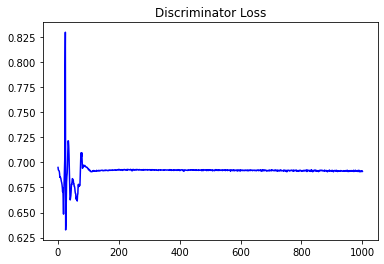

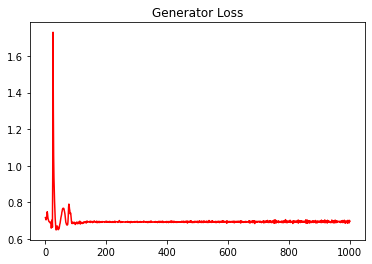

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2945744086463432


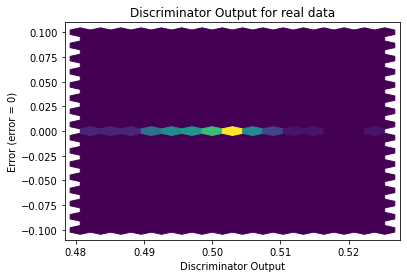

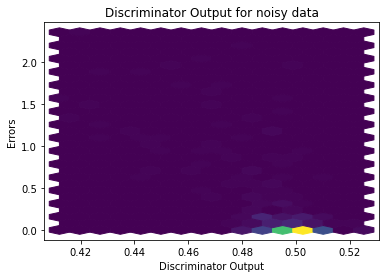

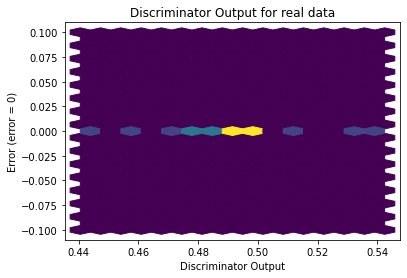

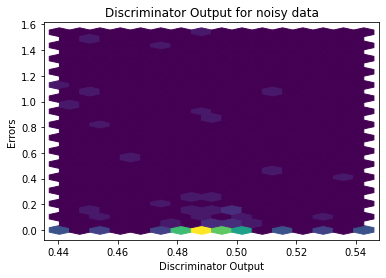

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


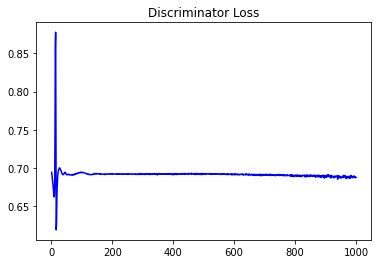

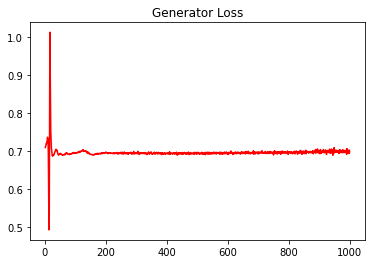

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3633123596428483


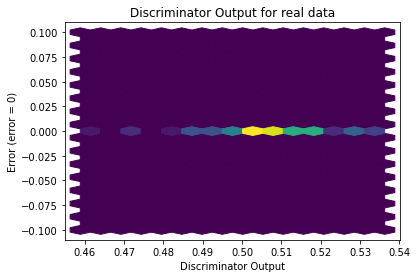

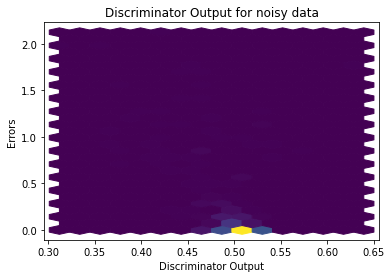

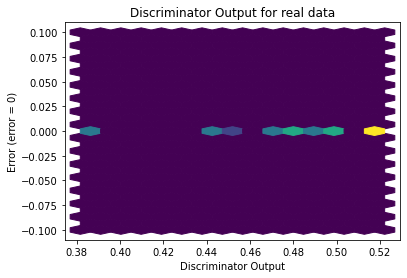

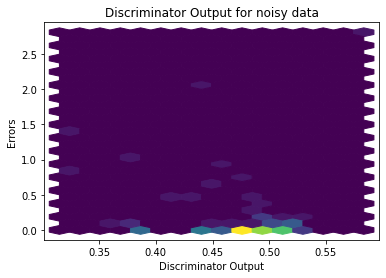

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0669]], requires_grad=True)
